In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [2]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(6,activation='softmax')(x) 

29097984/29084464 [==============================] - 0s 0us/step


In [3]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

In [4]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [5]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

In [6]:
! pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d harshul23/garbage

Saving kaggle.json to kaggle.json
 76% 31.0M/41.0M [00:00<00:00, 127MB/s]
100% 41.0M/41.0M [00:00<00:00, 161MB/s]


In [7]:
!unzip garbage.zip

Archive:  garbage.zip
  inflating: dataset/Dataset/Test/Cardboard/cardboard10.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard100.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard101.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard102.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard103.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard104.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard105.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard106.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard107.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard108.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard109.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard11.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard110.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard111.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard112.jpg  
  inflating: dataset/Dataset/Test/C

In [8]:
main_dir = "dataset/Dataset"
data_train=[]
data_test=[]
labels_train=[]
labels_test=[]
#random.seed(42)
#imagePaths = sorted(list(os.listdir(main_dir)))
#random.shuffle(imagePaths)
#print(imagePaths)


In [9]:
!rm /content/dataset/Dataset/Train/cardboard/.ipynb_checkpoints
!rm /content/dataset/Dataset/Train/cardboard/Thumbs.db

rm: cannot remove '/content/dataset/Dataset/Train/cardboard/.ipynb_checkpoints': No such file or directory


In [10]:
path_train=sorted(list(os.listdir("/content/dataset/Dataset/Train")))
for img in path_train:
    path2train=sorted(list(os.listdir("/content/dataset/Dataset/Train"+'/'+img)))
    for i in path2train:
        image = cv2.imread(("/content/dataset/Dataset/Train"+'/'+img+'/'+i))
        image = cv2.resize(image, (128,128))
        image = img_to_array(image)
        data_train.append(image)
        l_train = label_train = img
        labels_train.append(l_train)

In [11]:
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print(labels_train[0])

[1 0 0 0 0 0]


In [12]:
path_test=sorted(list(os.listdir("/content/dataset/Dataset/Test")))
for img in path_test:
    path2test=sorted(list(os.listdir("/content/dataset/Dataset/Test"+'/'+img)))
    for i in path2test:
        imagetest = cv2.imread(("/content/dataset/Dataset/Test"+'/'+img+'/'+i))
        imagetest = cv2.resize(imagetest, (128,128))
        imagetest = img_to_array(imagetest)
        data_test.append(imagetest)
        l_test = label_test = img
        labels_test.append(l_test)

In [13]:
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)
print(labels_test[0])

[1 0 0 0 0 0]


In [14]:
(xtrain,ytrain)=(data_train,labels_train)
(xtest,ytest) = (data_test,labels_test)

In [15]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=30,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30

Epoch 00001: val_loss improved from inf to 0.92663, saving model to model.h5
15/15 - 43s - loss: 1.6130 - accuracy: 0.5237 - val_loss: 0.9266 - val_accuracy: 0.6695 - lr: 0.0010 - 43s/epoch - 3s/step
Epoch 2/30

Epoch 00002: val_loss improved from 0.92663 to 0.73652, saving model to model.h5
15/15 - 15s - loss: 0.9397 - accuracy: 0.7126 - val_loss: 0.7365 - val_accuracy: 0.7342 - lr: 0.0010 - 15s/epoch - 1s/step
Epoch 3/30

Epoch 00003: val_loss improved from 0.73652 to 0.56072, saving model to model.h5
15/15 - 20s - loss: 0.7645 - accuracy: 0.7484 - val_loss: 0.5607 - val_accuracy: 0.8024 - lr: 0.0010 - 20s/epoch - 1s/step
Epoch 4/30

Epoch 00004: val_loss improved from 0.56072 to 0.47208, saving model to model.h5
15/15 - 15s - loss: 0.6796 - accuracy: 0.7859 - val_loss: 0.4721 - val_accuracy: 0.8404 - lr: 0.0010 - 15s/epoch - 1s/step
Epoch 5/30

Epoch 00005: val_loss improved from 0.47208 to 0.42883, saving model to model.h5
15/15 - 20s - loss: 0.5853 - accuracy: 0.7948 -

Text(0.5, 0, 'epoch')

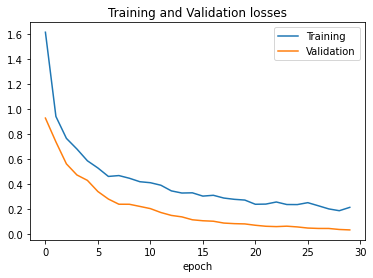

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

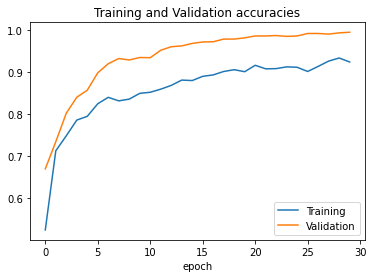

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('epoch')

In [18]:
accuracy = model.evaluate(xtest, ytest)
print("Accuracy of DenseNet121 model on test data = ", accuracy[1] * 100, "%")

16/16 [==============================] - 3s 174ms/step - loss: 0.8199 - accuracy: 0.7555
Accuracy of DenseNet121 model on test data =  75.5467176437378 %
